In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler


from Perceptron_ import *
from nn import *

sns.set_style('whitegrid')

## Questão 01

$\hspace{0.5cm}$A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1. Formule este
problema como um problema de classificação de padrões e treine uma rede Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. Para
solução do problema defina antes um conjunto de treinamento e um conjunto de validação.

In [288]:
dados = np.array([[0,0,0],
                 [0,0,1],
                 [0,1,0],
                 [0,1,1],
                 [1,0,0],
                 [1,0,1],
                 [1,1,0],
                 [1,1,1]])

dados.shape

(8, 3)

In [289]:
classes = np.array( [i for i in range(8)] ).T

In [290]:
dados = np.column_stack((dados,classes))

dados

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 2],
       [0, 1, 1, 3],
       [1, 0, 0, 4],
       [1, 0, 1, 5],
       [1, 1, 0, 6],
       [1, 1, 1, 7]])

In [291]:
df = pd.DataFrame(dados, columns=['One','Two','Three','Class'])

df

,One,Two,Three,Class
0,0,0,0,0
1,0,0,1,1
2,0,1,0,2
3,0,1,1,3
4,1,0,0,4
5,1,0,1,5
6,1,1,0,6
7,1,1,1,7


In [292]:
def create_new_df(df, number_new_dados):
    new_df = df.copy()
    values = new_df[['One','Two','Three']].values

    for passo in range(number_new_dados):

        ruido = np.array([np.random.uniform(-0.1,0.1) for i in range(24)]).reshape(8,3)

        new_values = values + ruido

        for i in range(len(new_values)):
            new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],new_values[i][2],i]
    
    return new_df

In [293]:
new_df = create_new_df(df, 500)
new_df = new_df.sort_values(by=['Class'])
new_df

,One,Two,Three,Class
0,0.000000,0.000000,0.000000,0.0
2960,-0.010038,-0.094023,0.071368,0.0
840,-0.055161,-0.007782,-0.006545,0.0
2952,0.017210,0.020477,-0.006850,0.0
848,0.000320,-0.054151,0.017764,0.0
...,...,...,...,...
2599,1.084182,0.952437,0.985466,7.0
1127,1.074972,1.009025,0.997549,7.0
2591,0.944529,1.008601,1.075278,7.0
2615,0.912905,1.010393,0.944183,7.0


In [294]:
new_df['Class'].value_counts()

7.0    501
6.0    501
5.0    501
4.0    501
3.0    501
2.0    501
1.0    501
0.0    501
Name: Class, dtype: int64

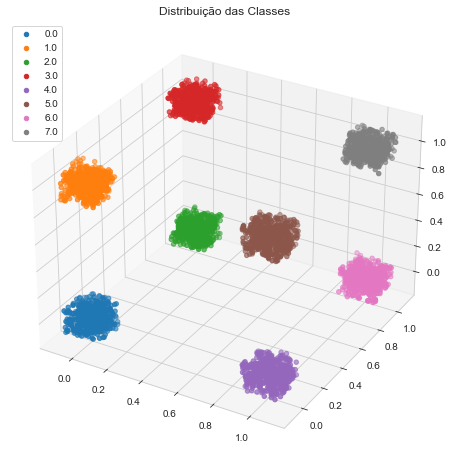

In [297]:
def plot3d(df):
    
    classes = df['Class'].unique()
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y,z = valores[:,0] , valores[:,1], valores[:,2]
        ax.scatter(x,y,z, label=classe)
        
    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")

plot3d(new_df)

In [37]:
X = new_df[['One','Two','Three']].values
y = new_df[['Class']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
X_train.shape , X_test.shape

((2805, 3), (1203, 3))

## Perceptron Sklearn

In [38]:
model = Perceptron()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [39]:
print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('Matriz de confusão: \n')
print(confusion_matrix(y_test,y_pred))

Reporte: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       142
         1.0       1.00      1.00      1.00       158
         2.0       1.00      1.00      1.00       150
         3.0       1.00      1.00      1.00       143
         4.0       1.00      1.00      1.00       148
         5.0       1.00      1.00      1.00       149
         6.0       1.00      1.00      1.00       159
         7.0       1.00      1.00      1.00       154

    accuracy                           1.00      1203
   macro avg       1.00      1.00      1.00      1203
weighted avg       1.00      1.00      1.00      1203

Matriz de confusão: 

[[142   0   0   0   0   0   0   0]
 [  0 158   0   0   0   0   0   0]
 [  0   0 150   0   0   0   0   0]
 [  0   0   0 143   0   0   0   0]
 [  0   0   0   0 148   0   0   0]
 [  0   0   0   0   0 149   0   0]
 [  0   0   0   0   0   0 159   0]
 [  0   0   0   0   0   0   0 154]]


## Implementação - Perceptron

In [50]:
dim_entrada = X.shape[1]
dim_saida = 8

model = Perceptron_(dim_entrada,dim_saida,ini_pesos=random_normal, learning_rate=1e-3)
model.fit(X_train,y_train, epochs=200, verbose=100)
y_pred = model.predict(X_test)

epoch:    0/200 loss_train: 3.62869875
epoch:  100/200 loss_train: 0.61550802
epoch:  200/200 loss_train: 0.66274510


In [51]:
print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('Matriz de confusão: \n')
print(confusion_matrix(y_test,y_pred))

Reporte: 

              precision    recall  f1-score   support

         0.0       1.00      0.20      0.34       142
         1.0       0.96      1.00      0.98       158
         2.0       0.80      0.99      0.88       150
         3.0       0.91      1.00      0.95       143
         4.0       0.86      1.00      0.92       148
         5.0       0.90      1.00      0.95       149
         6.0       0.96      1.00      0.98       159
         7.0       0.96      0.99      0.97       154

    accuracy                           0.90      1203
   macro avg       0.92      0.90      0.87      1203
weighted avg       0.92      0.90      0.88      1203

Matriz de confusão: 

[[ 29   7  38  15  25  15   6   7]
 [  0 158   0   0   0   0   0   0]
 [  0   0 149   0   0   0   1   0]
 [  0   0   0 143   0   0   0   0]
 [  0   0   0   0 148   0   0   0]
 [  0   0   0   0   0 149   0   0]
 [  0   0   0   0   0   0 159   0]
 [  0   0   0   0   0   2   0 152]]


## Questão 2 

$\hspace{0.5cm}$Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as duas
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

$a)$A função lógica XOR

$b) f(x) = \dfrac{\sin(\pi x)}{\pi x} , 0 \leq x \leq 4$

### Letra A

In [52]:
dados = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

saida = np.array([[0,1,1,0]]).T

dados_ = np.column_stack((dados,saida))

In [53]:
df = pd.DataFrame(dados_, columns=['One','Two','Class'])
df

,One,Two,Class
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


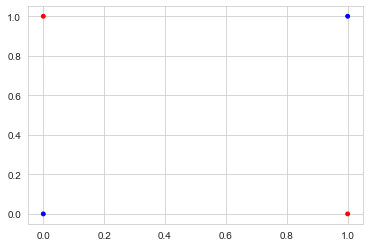

In [62]:
plt.scatter(dados[:,0],dados[:,1], c=saida, s=15, cmap='bwr')

In [120]:
def create_new_df_2(df, number_new_dados):
    new_df = df.copy()
    values = new_df[['One','Two']].values

    for passo in range(number_new_dados):

        ruido = np.array([np.random.uniform(-0.3,0.3) for i in range(8)]).reshape(4,2)

        new_values = values + ruido

        for i in range(len(new_values)):
            if i == 2:
                new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],1]
            elif i == 3:
                new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],0]
            else:
                new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],i]
            
    return new_df

In [121]:
new_df = create_new_df_2(df, 200)

In [122]:
new_df

,One,Two,Class
0,0.000000,0.000000,0.0
1,0.000000,1.000000,1.0
2,1.000000,0.000000,1.0
3,1.000000,1.000000,0.0
4,-0.106916,-0.287278,0.0
...,...,...,...
799,1.020014,0.989562,0.0
800,0.177967,0.061149,0.0
801,0.204117,1.092286,1.0
802,0.846776,-0.002133,1.0


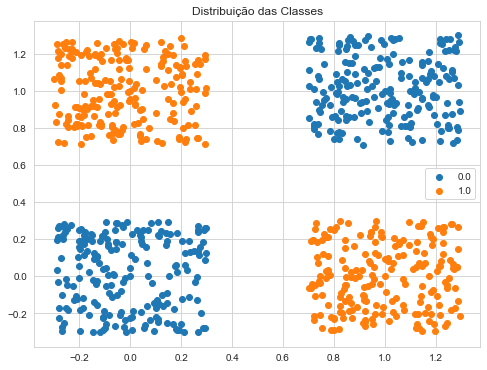

In [123]:
def plot2d(df):
    
    classes = df['Class'].unique()
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    
    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y = valores[:,0] , valores[:,1]
        ax.scatter(x,y, label=classe)
        
    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")

plot2d(new_df)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['One','Two']].values, new_df['Class'], test_size=0.3)
X_test.shape

(242, 2)

## MLPClassifier Sklearn

In [125]:
model = MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       121
         1.0       1.00      1.00      1.00       121

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



<AxesSubplot:>

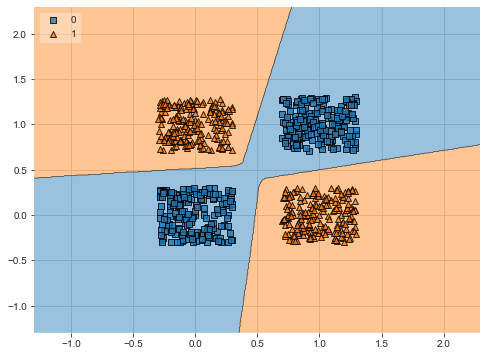

In [127]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plot_decision_regions(X=new_df[['One','Two']].values, y=new_df['Class'].ravel().astype(np.int), clf=model, legend=2)

## Implementação da rede

In [139]:
y_train = y_train.to_numpy().reshape(-1,1)

In [140]:
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]

In [157]:
model = NeuralNetwork(func_cost=cross_entropy, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=relu))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=relu))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=sigmoid))

model.fit(X_train,y_train, epochs=3000, verbose=300)

y_pred = model.predict(X_test)

epoch:    0/3000 loss_train: 1.18032076
epoch:  300/3000 loss_train: 0.01108788
epoch:  600/3000 loss_train: 0.00485986
epoch:  900/3000 loss_train: 0.00301071
epoch: 1200/3000 loss_train: 0.00214121
epoch: 1500/3000 loss_train: 0.00164451
epoch: 1800/3000 loss_train: 0.00132749
epoch: 2100/3000 loss_train: 0.00110795
epoch: 2400/3000 loss_train: 0.00094757
epoch: 2700/3000 loss_train: 0.00082554
epoch: 3000/3000 loss_train: 0.00072992


In [158]:
for i in range(len(y_pred)):
    if y_pred[i,0] >= 0.5:
        y_pred[i,0] = 1
    else:
        y_pred[i,0] = 0

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       121
         1.0       1.00      1.00      1.00       121

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



<AxesSubplot:>

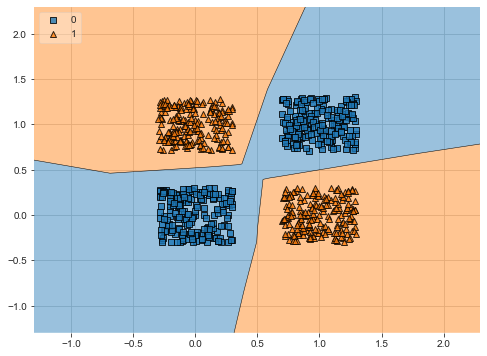

In [160]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plot_decision_regions(X=new_df[['One','Two']].values, y=new_df['Class'].ravel().astype(np.int), clf=model, legend=2)

## Letra B

In [161]:
x = np.linspace(0.01,4,200)
f = lambda x: np.sin(np.pi*x)/(np.pi*x)
y = f(x)
y = np.array([y])

In [162]:
df = pd.DataFrame(data={'x':x,'y':y[0]})
df

,x,y
0,0.010000,9.998355e-01
1,0.030050,9.985153e-01
2,0.050101,9.958762e-01
3,0.070151,9.919247e-01
4,0.090201,9.866701e-01
...,...,...
195,3.919799,-2.024469e-02
196,3.939849,-1.517657e-02
197,3.959899,-1.009988e-02
198,3.979950,-5.034484e-03


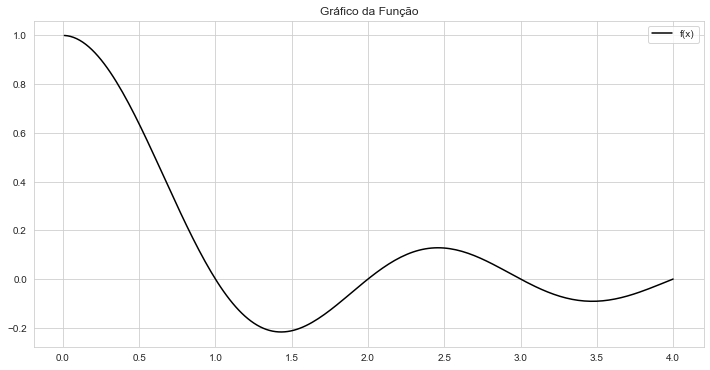

In [166]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.set_title('Gráfico da Função')
ax.plot(x,y[0], c='black',label='f(x)')
ax.legend(loc='best')

## Normalização dos dados

In [167]:
minmax = MinMaxScaler()

x = minmax.fit_transform(x.reshape(-1,1))

X_train, X_test, y_train,y_test = train_test_split(x,y[0], test_size=0.3)
X_train.shape

(140, 1)

## Rede Keras

In [168]:
model_ = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

model_.compile(optimizer='adam',metrics=['mean_squared_error'],loss =['mean_squared_error'] )
history = model_.fit(X_train, y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
5/5 [==============================] - 0s 29ms/step - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.1590 - val_mean_squared_error: 0.1590
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.1267 - val_mean_squared_error: 0.1267
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 7/100
5/5 [============================

In [169]:
y_pred_ = model_.predict(X_test)

In [170]:
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")

MSE: 0.1043687996421635 
MAE: 0.3333429668420884


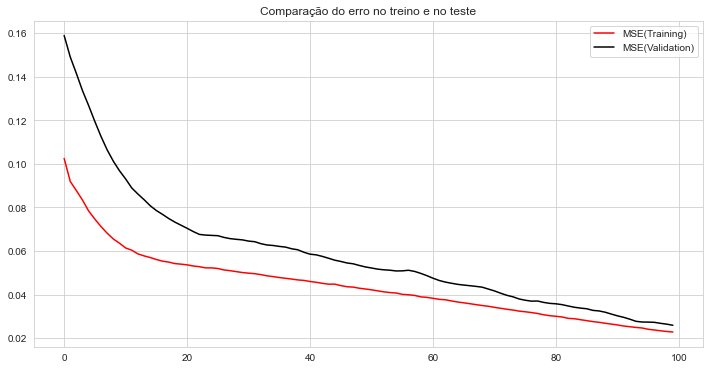

In [172]:
plt.figure(figsize=(12,6))
plt.title('Comparação do erro no treino e no teste')
plt.plot(history.history['loss'],color='red',label='MSE(Training)')
plt.plot(history.history['val_loss'],color='black',label='MSE(Validation)')
plt.legend(loc='best')

## MLPRegressor Sklearn

In [173]:
model__ = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000)
history = model__.fit(X_train,y_train)
y_pred__ = model__.predict(X_test)

In [174]:
print(f"MSE: {0.5*np.mean((y_test-y_pred__)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred__))}")

MSE: 0.036535629241063974 
MAE: 0.2000403307748552


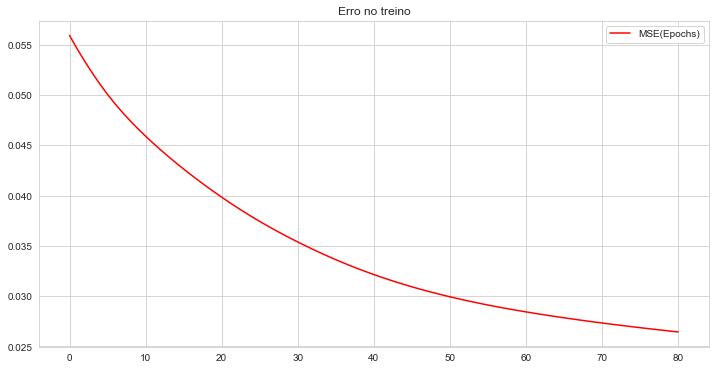

In [175]:
plt.figure(figsize=(12,6))
plt.title('Erro no treino')
plt.plot(history.loss_curve_,color='red',label='MSE(Epochs)')
plt.legend(loc='best')

## Implementação da rede

In [176]:
y_train = y_train.reshape(-1,1)
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]

In [177]:
model = NeuralNetwork(func_cost=mse, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=tanh ))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=tanh ))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=linear))

model.fit(X_train, y_train, epochs=3000, verbose=300)
y_pred = model.predict(X_test)

epoch:    0/3000 loss_train: 0.05075143
epoch:  300/3000 loss_train: 0.02684475
epoch:  600/3000 loss_train: 0.01798724
epoch:  900/3000 loss_train: 0.00941711
epoch: 1200/3000 loss_train: 0.00610554
epoch: 1500/3000 loss_train: 0.00498863
epoch: 1800/3000 loss_train: 0.00408794
epoch: 2100/3000 loss_train: 0.00295363
epoch: 2400/3000 loss_train: 0.00197687
epoch: 2700/3000 loss_train: 0.00149230
epoch: 3000/3000 loss_train: 0.00124898


In [178]:
print(f"MAE: {np.mean(abs(y_test-y_pred))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")

MAE: 0.37649876198092197
MSE: 0.14058969115755596 


In [179]:
out = model.predict(x)

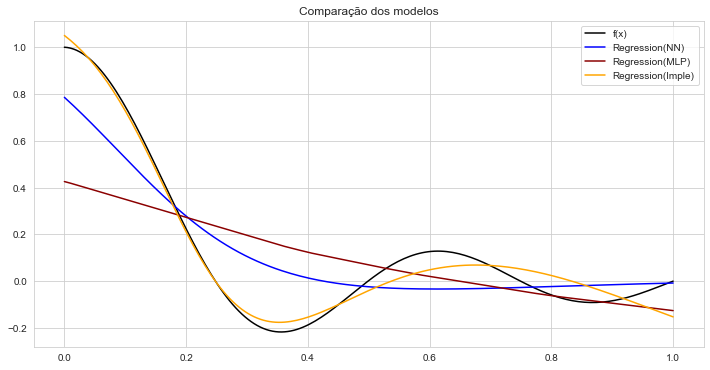

In [180]:
plt.figure(figsize=(12,6))
plt.title('Comparação dos modelos')
plt.plot(x,y[0],color='black',label='f(x)')
plt.plot(x, model_.predict(x),color='blue',label='Regression(NN)')
plt.plot(x, model__.predict(x.reshape(-1,1)),color='darkred',label='Regression(MLP)')
plt.plot(x.reshape(-1,1), out ,color = 'orange', label='Regression(Imple)')
plt.legend()

In [181]:
print('Rede Keras: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")
print('\nMLPRegressor Sklearn: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred__)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred__))}")
print('\nImplementação da rede: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred))}")

Rede Keras: 

MSE: 0.1043687996421635 
MAE: 0.3333429668420884

MLPRegressor Sklearn: 

MSE: 0.036535629241063974 
MAE: 0.2000403307748552

Implementação da rede: 

MSE: 0.14058969115755596 
MAE: 0.37649876198092197


## Questão 03

$\hspace{0.5cm}$Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais à raiz de 2. Os dados das
classes C1, C2, C3, C4 correspondem aos quatro setores do losango e as outras quatro
classes correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão.

In [190]:
def create_df(n_examples):
    x = np.random.uniform(-1,1,n_examples)
    y = np.random.uniform(-1,1,n_examples)
    
    df = pd.DataFrame(data={'x':[0.4],'y':[0.4], 'Class':[0]})
    
    for i in range(len(x)):

        if y[i] <= 1 - x[i] and x[i] >= 0 and y[i] >= 0:
            df.loc[len(df)] = [x[i], y[i], 0]

        elif (y[i] >= 1 - x[i] and x[i] >= 0 and y[i] >= 0 and x[i]**2 + y[i]**2 <= 1):
            df.loc[len(df)] = [x[i],y[i], 4]

        elif y[i] <= 1 + x[i] and x[i] <= 0 and y[i] >= 0:
            df.loc[len(df)] = [x[i],y[i], 1]

        elif y[i] >= 1 + x[i] and x[i] <= 0 and y[i] >= 0 and x[i]**2 + y[i]**2 <= 1:
            df.loc[len(df)] = [x[i],y[i], 5]

        elif y[i] >= x[i] - 1 and x[i] >= 0 and y[i] <= 0:
            df.loc[len(df)] = [x[i],y[i], 3]

        elif y[i] <= x[i] - 1 and x[i] >= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <= 1:
            df.loc[len(df)] = [x[i],y[i], 7]

        elif y[i] >= -1 - x[i] and x[i] <= 0 and y[i] <= 0:
            df.loc[len(df)] = [x[i],y[i], 2]

        elif y[i] <= -1 - x[i] and x[i] <= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <= 1:
            df.loc[len(df)] = [x[i],y[i], 6]
    
    return df

In [199]:
df = create_df(5000)

In [200]:
df = df.sort_values(by='Class')
df

,x,y,Class
0,0.400000,0.400000,0.0
1499,0.324561,0.406509,0.0
1501,0.062084,0.082362,0.0
1502,0.649716,0.138813,0.0
1507,0.075920,0.624573,0.0
...,...,...,...
2644,0.551160,-0.828459,7.0
1726,0.757231,-0.334236,7.0
1022,0.712824,-0.632506,7.0
1953,0.293991,-0.910120,7.0


In [201]:
df['Class'].value_counts()

3.0    642
0.0    630
2.0    623
1.0    619
7.0    371
4.0    369
5.0    339
6.0    313
Name: Class, dtype: int64

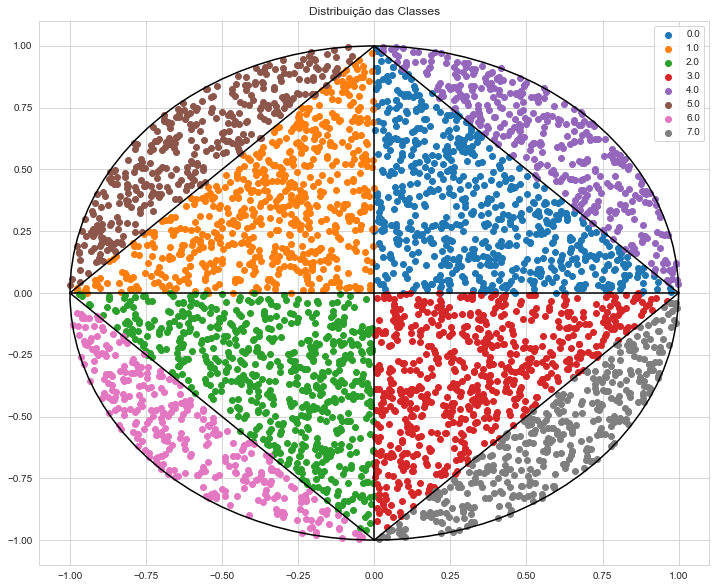

In [220]:
def plot2d(df):
    
    classes = df['Class'].unique()
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    
    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y = valores[:,0] , valores[:,1]
        ax.scatter(x,y, label=classe)
    
    #círculo
    theta = np.linspace( 0 , 2 * np.pi , 100) 
  
    raio = 1
  
    a = raio * np.cos( theta ) 
    b = raio * np.sin( theta ) 
    
    #reta 1
    x1 = np.linspace(0,1,100)
    f1 = lambda x: 1 - x
    y1 = f1(x1)
    
    #reta 2
    x2 = np.linspace(-1,0,100)
    f2 = lambda x: 1 + x
    y2 = f2(x2)
    
    #reta 3
    x3 = np.linspace(-1,0,100)
    f3 = lambda x: - 1 - x
    y3 = f3(x3)
    
    #reta 4
    x4 = np.linspace(0,1,100)
    f4 = lambda x: x - 1
    y4 = f4(x4)
    
    #eixo x e y
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    
    ax.plot(a,b, x1,y1, x2,y2, x3,y3 , x4,y4, c='black')
    ax.plot(np.zeros((100,)),y, x,np.zeros((100,)) ,c='black')
    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")

plot2d(df)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']].values,df['Class'].values,test_size=0.3)
y_train

array([2., 4., 0., ..., 4., 3., 6.])

In [222]:
classes = [f'C{i}' for i in range(1,9)]
classes

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

## MLPClassifier Sklearn

In [223]:
model = MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [224]:
print('Reporte: ')
print(classification_report(y_test,y_pred, target_names=classes))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,y_pred))

Reporte: 
              precision    recall  f1-score   support

          C1       0.98      0.99      0.99       188
          C2       0.95      1.00      0.97       173
          C3       0.99      0.98      0.98       199
          C4       1.00      0.97      0.98       208
          C5       1.00      0.98      0.99       100
          C6       1.00      0.94      0.97       100
          C7       0.99      0.99      0.99        97
          C8       0.96      1.00      0.98       107

    accuracy                           0.98      1172
   macro avg       0.98      0.98      0.98      1172
weighted avg       0.98      0.98      0.98      1172

Matriz de Confusão: 

[[187   0   0   1   0   0   0   0]
 [  0 173   0   0   0   0   0   0]
 [  0   3 195   0   0   0   1   0]
 [  1   0   1 202   0   0   0   4]
 [  2   0   0   0  98   0   0   0]
 [  0   6   0   0   0  94   0   0]
 [  0   0   1   0   0   0  96   0]
 [  0   0   0   0   0   0   0 107]]


## Implementação da rede

In [225]:
one = OneHotEncoder(sparse=False)

y_train = one.fit_transform(y_train.reshape(-1,1))
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [226]:
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]

In [227]:
model = NeuralNetwork(func_cost=softmax_neg_log_likelihood, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=tanh))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=relu))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=linear))

model.fit(X_train, y_train, epochs=3000, verbose=300)
y_pred = model.predict(X_test)

epoch:    0/3000 loss_train: 5.16727996
epoch:  300/3000 loss_train: 0.35696026
epoch:  600/3000 loss_train: 0.22996225
epoch:  900/3000 loss_train: 0.17866572
epoch: 1200/3000 loss_train: 0.15002262
epoch: 1500/3000 loss_train: 0.13148410
epoch: 1800/3000 loss_train: 0.11812836
epoch: 2100/3000 loss_train: 0.10796180
epoch: 2400/3000 loss_train: 0.09983090
epoch: 2700/3000 loss_train: 0.09306231
epoch: 3000/3000 loss_train: 0.08731641


In [228]:
for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        
        if np.argmax(y_pred[i]) == j:
            
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0

In [229]:
pred = np.argmax(y_pred, axis=1)

print('Reporte: ')
print(classification_report(y_test,pred, target_names=classes))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,pred))

Reporte: 
              precision    recall  f1-score   support

          C1       0.98      0.99      0.98       188
          C2       0.96      0.98      0.97       173
          C3       0.98      0.95      0.97       199
          C4       0.99      0.97      0.98       208
          C5       0.99      0.98      0.98       100
          C6       0.98      0.97      0.97       100
          C7       0.97      0.99      0.98        97
          C8       0.96      1.00      0.98       107

    accuracy                           0.98      1172
   macro avg       0.98      0.98      0.98      1172
weighted avg       0.98      0.98      0.98      1172

Matriz de Confusão: 

[[186   0   0   1   1   0   0   0]
 [  1 169   1   0   0   2   0   0]
 [  0   4 190   2   0   0   3   0]
 [  1   0   1 201   0   0   0   5]
 [  2   0   0   0  98   0   0   0]
 [  0   3   0   0   0  97   0   0]
 [  0   0   1   0   0   0  96   0]
 [  0   0   0   0   0   0   0 107]]


## Questão 04

$\hspace{0.5cm}$Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo,
até predição de três passos, da série temporal $x(n) = \sin{(n + \sin^{2}{(n)})}  $.Avalie o desempenho mostrando para cada caso os erros de predição.

In [239]:
x = np.arange(0,100)
f = lambda x: np.sin(x + np.sin(x)**2)
y = f(x)

In [240]:
df = pd.DataFrame(y, index=x, columns=['Saída'])

<AxesSubplot:>

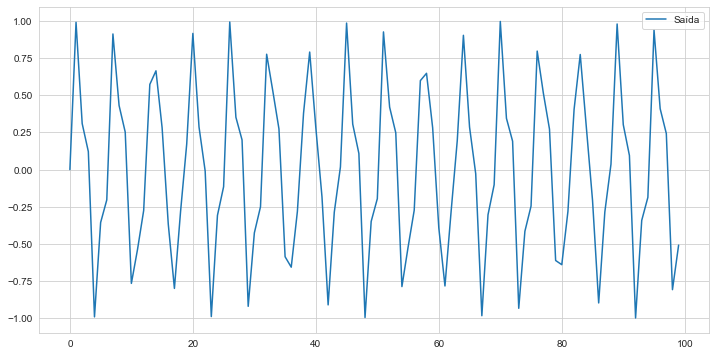

In [241]:
df.plot(figsize=(12,6))

In [242]:
def series_to_supervised(serie, steps_in):
    features = pd.DataFrame() 
    features['t'] = serie 
    for i in range(1, steps_in+1): 
        features['t-'+str(i)] = serie.shift(i)
    features = features.iloc[steps_in:]
    return features

In [243]:
ts = df['Saída']
k = 12
data_features = series_to_supervised(ts, k)
data_features

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12
12,-0.274875,-0.536589,-0.765090,0.252184,0.431314,0.912128,-0.203677,-0.355687,-0.990266,0.121378,0.309599,0.990592,0.000000
13,0.573007,-0.274875,-0.536589,-0.765090,0.252184,0.431314,0.912128,-0.203677,-0.355687,-0.990266,0.121378,0.309599,0.990592
14,0.664377,0.573007,-0.274875,-0.536589,-0.765090,0.252184,0.431314,0.912128,-0.203677,-0.355687,-0.990266,0.121378,0.309599
15,0.281243,0.664377,0.573007,-0.274875,-0.536589,-0.765090,0.252184,0.431314,0.912128,-0.203677,-0.355687,-0.990266,0.121378
16,-0.366203,0.281243,0.664377,0.573007,-0.274875,-0.536589,-0.765090,0.252184,0.431314,0.912128,-0.203677,-0.355687,-0.990266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.938778,-0.186532,-0.341527,-0.997592,0.094811,0.302159,0.979197,0.036651,-0.285195,-0.896506,-0.206504,0.281574,0.774087
96,0.409520,0.938778,-0.186532,-0.341527,-0.997592,0.094811,0.302159,0.979197,0.036651,-0.285195,-0.896506,-0.206504,0.281574
97,0.242818,0.409520,0.938778,-0.186532,-0.341527,-0.997592,0.094811,0.302159,0.979197,0.036651,-0.285195,-0.896506,-0.206504
98,-0.807201,0.242818,0.409520,0.938778,-0.186532,-0.341527,-0.997592,0.094811,0.302159,0.979197,0.036651,-0.285195,-0.896506


In [252]:
X = data_features[['t-12','t-11','t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3']].values
y = data_features[['t-2','t-1','t']].values

X_train,y_train = X[:len(X)//2 + 20], y[:len(y)//2 + 20]
X_test,y_test = X[len(X)//2 + 20:], y[len(y)//2 + 20:]

## MLPRegressor Sklearn

In [255]:
model_ = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000)
history = model_.fit(X_train,y_train)
y_pred_ = model_.predict(X_test)

In [256]:
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")

MAE: 0.05811954144701072
MSE: 0.002453105339061029 


## Entrada f(0) até f(9)

In [257]:
x_input = np.array([[f(i) for i in range(10)]])
x_input

array([[ 0.        ,  0.99059229,  0.30959858,  0.12137777, -0.99026631,
        -0.35568748, -0.20367709,  0.91212808,  0.43131356,  0.25218378]])

In [258]:
print('Saída do modelo MLPRegressor: \n')
print(model_.predict(x_input))
print('\nValores originais: \n')
print(f(10),f(11),f(12))

Saída do modelo MLPRegressor: 

[[-0.78007126 -0.55774717 -0.25515305]]

Valores originais: 

-0.7650899493327032 -0.536589446298489 -0.274875409552886


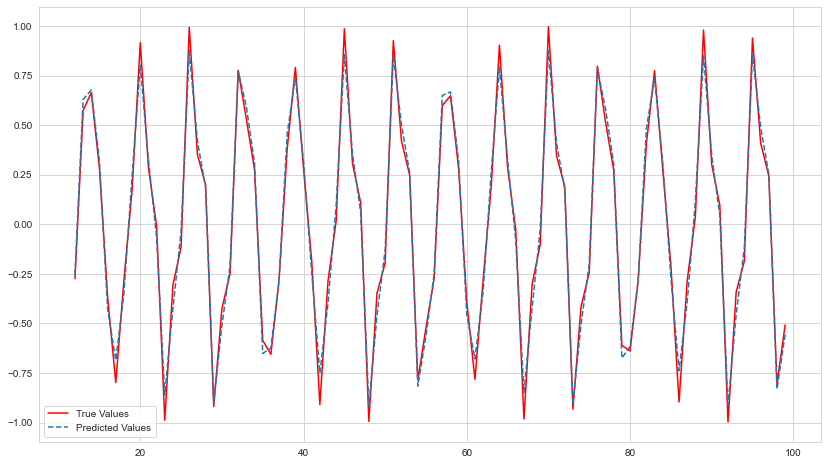

In [286]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(x[k:],f(x[k:]),color='red', label='True Values')
ax.plot(x[k:], model_.predict(X)[:,2], '--',label='Predicted Values' )
ax.legend(loc='best')

## Implementação da rede

In [259]:
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]

In [260]:
model = NeuralNetwork(func_cost=mse, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=sigmoid))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=sigmoid))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=linear))

model.fit(X_train,y_train, epochs=3000, verbose=300)
y_pred = model.predict(X_test)

epoch:    0/3000 loss_train: 0.89790646
epoch:  300/3000 loss_train: 0.00791049
epoch:  600/3000 loss_train: 0.00305948
epoch:  900/3000 loss_train: 0.00157734
epoch: 1200/3000 loss_train: 0.00109648
epoch: 1500/3000 loss_train: 0.00089750
epoch: 1800/3000 loss_train: 0.00078347
epoch: 2100/3000 loss_train: 0.00070320
epoch: 2400/3000 loss_train: 0.00064119
epoch: 2700/3000 loss_train: 0.00059111
epoch: 3000/3000 loss_train: 0.00054962


In [261]:
print('Saída do MLPRegressor: \n')
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print('\nSaída da implementação: \n')
print(f"MAE: {np.mean(abs(y_test-y_pred))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")

Saída do MLPRegressor: 

MAE: 0.05811954144701072
MSE: 0.002453105339061029 

Saída da implementação: 

MAE: 0.027320319886594505
MSE: 0.0005096559726230176 


## Entrada f(0) até f(9)

In [262]:
print('Saída do modelo MLPRegressor: \n')
print(model_.predict(x_input))
print('\nSaída da implementação: \n')
print(model.predict(x_input))
print('\nValores originais: \n')
print(f(10),f(11),f(12))

Saída do modelo MLPRegressor: 

[[-0.78007126 -0.55774717 -0.25515305]]

Saída da implementação: 

[[-0.74438969 -0.51535505 -0.30233596]]

Valores originais: 

-0.7650899493327032 -0.536589446298489 -0.274875409552886


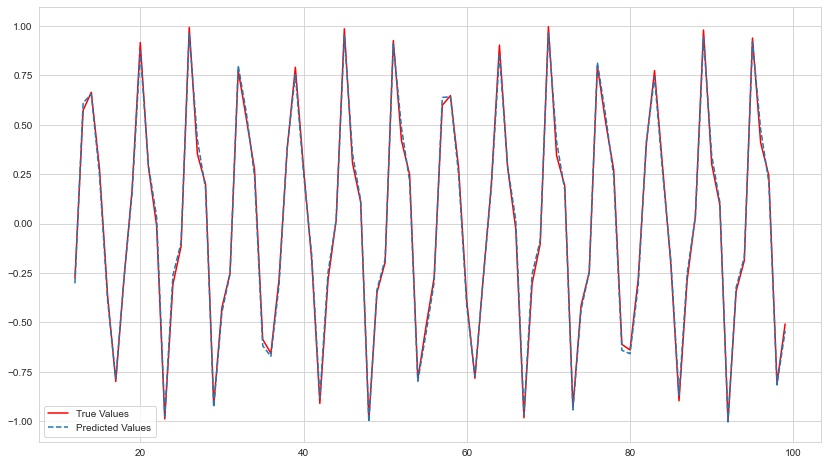

In [285]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(x[k:],f(x[k:]),color='red', label='True Values')
ax.plot(x[k:], model.predict(X)[:,2], '--',label='Predicted Values' )
ax.legend(loc='best')